In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
def gaussian2D(x,m,C):
    Ci=np.linalg.inv(C)
    dC=np.linalg.det(C)
    num=np.exp(-0.5* np.dot((x-m).T, np.dot(Ci,(x-m))))
    den =2*np.pi*dC
    return num/den


X1 shape (400, 2)
X2 shape (400, 2)


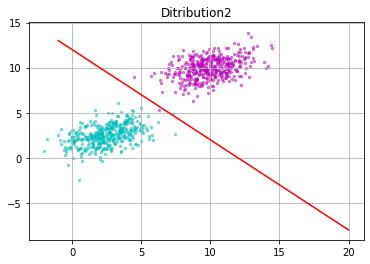

In [3]:
NumDataPerClass=400
#m1=np.array([[0,5]])
#m2=np.array([[5,0]])
m1=np.array([[2.5,2.5]])
m2=np.array([[10,10]])
c=np.array([[2,1],[1,2]])
A=np.linalg.cholesky(c)
X1=np.random.randn(NumDataPerClass,2)
# This means m1 is the mean of the distribution and C would be the covariance of the distribution Y1.
# This means m2 is the mean of the distribution and C would be the covariance of the distribution Y2.
#This is the reason why we found cholesky factor. In SVD A=UDU.T, where as D becomes I then A=U@U.T. 
#This simpler form of SVD where the D diagnoal matrix(eigen values) are identity matrix
Y1=X1@A+m1
X2=np.random.randn(NumDataPerClass,2)
Y2=X2@A+m2
print("X1 shape",X1.shape)
print("X2 shape",X2.shape)
plt.scatter(Y1[:,0], Y1[:,1],s=5,alpha=0.5,c='c')
plt.scatter(Y2[:,0], Y2[:,1], s=5,alpha=0.5,c='m')
plt.grid(True)
plt.title('Ditribution2')
x = np.linspace(-1,20,1000)
y = -x+12
plt.plot(x, y, '-r', label='y=2x+1')
plt.savefig('/Users/hyadaval/Desktop/DataScience/MachineLearning/Labs/Lab2/Distribution3')

#Z1=gaussian2D(x,m,C)

Text(0.5, 1.0, 'plot the concatenated ditributions')

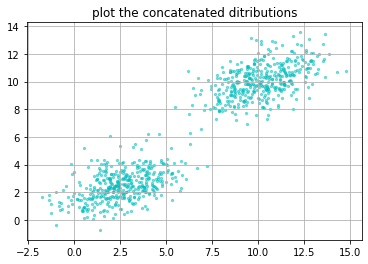

In [9]:
Y=np.concatenate((Y1,Y2)) # which means union of data sets
#just ones of 400 with 1 column
O =np.ones((2*NumDataPerClass,1))
#append with axis=1 means adding new
Y= np.append(Y,O, axis=1)
plt.scatter(Y[:,0], Y[:,1],s=5,alpha=0.5,c='c')
plt.grid(True)
plt.title('plot the concatenated ditributions')

In [10]:
labelPos=np.ones(NumDataPerClass)
labelNeg=-1*np.ones(NumDataPerClass)
f=np.concatenate((labelPos, labelNeg))

rIndex=np.random.permutation(2*NumDataPerClass)
#randommisation of the distribution of 400 elements so that all are randomly selected
#Here the size of Y and Yr are same as the size of rIndex is array of 400, so we are changing the indexes to randomise
Yr=Y[rIndex,]
#randomised labels with values intially -1 and 1
fr=f[rIndex]

# Intially there is no realtionship b/w Y and f, which is we are trying to derive 
#by correcting the wrongly classfied data
Y_train=Yr[0:NumDataPerClass]
f_train=fr[0:NumDataPerClass]
Y_test=Yr[NumDataPerClass:2*NumDataPerClass]
f_test=fr[NumDataPerClass:2*NumDataPerClass]

NTrain=NumDataPerClass
NTest=NumDataPerClass

print(Y_train.shape,f_train.shape,Y_test.shape, f_test.shape )

(400, 3) (400,) (400, 3) (400,)


In [11]:
def PercentCorrect(Inputs, targets, weights):
    n=len(targets)
    nCorrect=0
    for i in range(n):
        input1=Inputs[i]
        if(targets[i]*np.dot(input1,weights)>0):
            nCorrect+=1
    return 100*nCorrect/n

def PercentCorrect1(Inputs, targets, weights):
    n=len(targets)
    nCorrect=0
    for i in range(n):
        input1=Inputs[i]
        if(targets[i]*np.dot(input1,weights)>0):
            nCorrect+=1
    return 100*nCorrect/n
            
    

In [12]:
a=np.random.randn(3)
print(a)


[1.45148515 1.47074163 0.46658777]


In [13]:
print("intial percentage correctness with random weights", PercentCorrect(Y_train, f_train, a))

intial percentage correctness with random weights 47.5


In [14]:
MaxIter=1000
alpha=0.01
#These are ploting
P_train=np.zeros(MaxIter)
P_test=np.zeros(MaxIter)
for iter in range(MaxIter):
    #for each iteration, take some random data point and correct weights, not for every elements,
    #which means, we are training this based on 400 random points from the same distribution. as we do each 400 times
    r=np.floor(np.random.rand()*NumDataPerClass).astype(int)
  
    y=Y_train[r,:]
    if(f_train[r]*np.dot(y,a)<0):
        #we are multiplying f_train[r] for the sign change
        a+=alpha *f_train[r]*y
    P_train[iter]=PercentCorrect(Y_train, f_train, a)
    P_test[iter]=PercentCorrect(Y_test, f_test, a)
print("Percentage correct after iteration",PercentCorrect(Y_train, f_train, a),PercentCorrect(Y_test, f_test, a))
    

Percentage correct after iteration 100.0 99.75


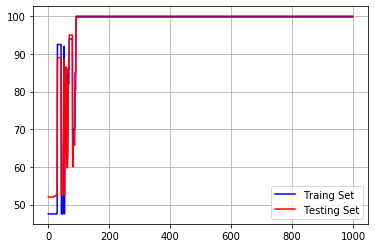

In [15]:
plt.plot(range(MaxIter), P_train, 'b', range(MaxIter),P_test, 'r')
plt.grid(True)
plt.gca().legend(('Traing Set','Testing Set'))

In [1]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
model =Perceptron()
model.fit(Y_train, f_train)
fh_train= model.predict(Y_train)
fh_test= model.predict(Y_test)
print("train accuracy",accuracy_score(fh_train, f_train))
print("test accuracy",accuracy_score(fh_test, f_test))



abline_values = np.dot(Y_train[2],a) 

# Plot the best fit line over the actual values

#plt.plot(Y_train[2], abline_values, 'b')




plt.scatter(Y[:,0], Y[:,1],s=5,alpha=0.5,c='c')
plt.grid(True)
plt.title('plot the concatenated ditributions')


NameError: name 'Y_train' is not defined

In [17]:
#Yes algorithm needs to change

<class 'pandas.core.frame.DataFrame'>


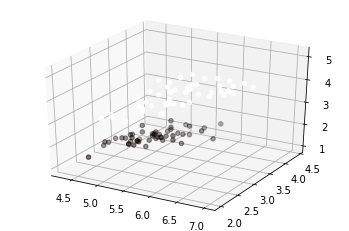

sizes (79, 5) (20, 5) (79,) (20,)
      0    1    2    3    4
26  5.0  3.4  1.6  0.4  1.0
86  6.7  3.1  4.7  1.5  1.0
2   4.7  3.2  1.3  0.2  1.0
55  5.7  2.8  4.5  1.3  1.0
75  6.6  3.0  4.4  1.4  1.0
92  5.8  2.6  4.0  1.2  1.0
16  5.4  3.9  1.3  0.4  1.0
73  6.1  2.8  4.7  1.2  1.0
54  6.5  2.8  4.6  1.5  1.0
94  5.6  2.7  4.2  1.3  1.0
53  5.5  2.3  4.0  1.3  1.0
91  6.1  3.0  4.6  1.4  1.0
78  6.0  2.9  4.5  1.5  1.0
13  4.3  3.0  1.1  0.1  1.0
7   5.0  3.4  1.5  0.2  1.0
30  4.8  3.1  1.6  0.2  1.0
22  4.6  3.6  1.0  0.2  1.0
24  4.8  3.4  1.9  0.2  1.0
33  5.5  4.2  1.4  0.2  1.0
8   4.4  2.9  1.4  0.2  1.0
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
9
-1
-8.679351778930151
0   -2.414112
1    0.397867
2    0.048058
3   -1.186975
4    1.963018
dtype: float64
36
-1
-10.096980977476543
0   -2.414112
1    0.397867
2    0.048058
3   -1.186975
4    1.963018
dtype: float64
35
-1
-9.014091023601994
0   -2.414112
1    0.397867
2    0.048058
3   -1.186975
4    

ValueError: operands could not be broadcast together with shapes (3,) (5,) 

In [90]:
#Use Pandas to read CSV
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
data =pd.read_csv("iris.data")
inputData=data.iloc[0:99]

#x : take features first 4 columns
# y: Last one categorial output of 3 
#plot on graphs with data distribution.
#Take 80 train and 20 test, divide the data into X_train nad X_test, T_train and y_test
#Check the accuracy score.
inputs= inputData.loc[:,'a':'d']
numOfRows=X.shape[0]
O =np.ones((numOfRows,1))
inputs=np.append(inputs,O, axis=1)
X=pd.DataFrame(inputs)
print(type(X))
y=inputData.loc[:, 'o'].map({'Iris-setosa':-1,'Iris-versicolor':1})

#plt.scatter(inputData.loc[:,'a'],inputData.loc[:,'b'],s=5,alpha=0.5,c='c')
#plt.scatter(inputData.loc[:,'c'],inputData.loc[:,'d'],s=5,alpha=0.5,c='m')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(inputData.loc[:,'a'],inputData.loc[:,'b'],inputData.loc[:,'c'], c=y,cmap=plt.hot())
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print("sizes", X_train.shape, X_test.shape, y_train.shape, y_test.shape )
print(X_test)
print(type(a))
print(type(y_train))

a=pd.Series(np.random.randn(5))
MaxIter=1000
alpha=0.01
#These are ploting
P_train=np.zeros(MaxIter)
P_test=np.zeros(MaxIter)
for iter in range(MaxIter):
    #for each iteration, take some random data point and correct weights, not for every elements,
    #which means, we are training this based on 400 random points from the same distribution. as we do each 400 times
    r=random.choice(y_train.index)
    print(r)
    print(y_train.loc[r])
    x=X_train.loc[r]
    print(np.dot(x,a))
    print(a)
    
    if(y_train.loc[r]*np.dot(x,a)<0):
        #we are multiplying f_train[r] for the sign change
        print(alpha)
        print("x", type(x))
        print("a", type(a))
        print("x shape", x.shape)
        print("a shape", a.shape)
       # print("y_train",y_train[r])
        a.update(alpha *Y_train[r]*x)
        #TO DO: Learn more about pandas series and come back to finish
   
    #P_train[iter]=PercentCorrect(X_train, Y_train, a)
    #P_test[iter]=PercentCorrect(X_test, Y_test, a)
print("Percentage correct after iteration",PercentCorrect(X_train, y_train, a),PercentCorrect(X_test, y_test, a))
    